<a href="https://colab.research.google.com/github/vageeshmaiya/Deep-Learning-based-Battery-Synthetic-Data/blob/main/N_beats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# N_Beats

#### Installing Darts

In [1]:
pip install darts

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from os.path import dirname, basename
from os import getcwd
import sys


def fix_pythonpath_if_working_locally():
    """Add the parent path to pythonpath if current working dir is darts/examples"""
    cwd = getcwd()
    if basename(cwd) == 'examples':
        sys.path.insert(0, dirname(cwd))

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from darts import TimeSeries
from darts.models import NBEATSModel
from darts.dataprocessing.transformers import Scaler, MissingValuesFiller
from darts.metrics import mape, r2_score

#### Uploading Dataset

1. Make sure to upload the dataset to be used in google drive
2. Make the necessary changes in the path by copying the path of the dataset uploaded

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
path = "/content/drive/MyDrive/dataset4.csv"
df = pd.read_csv(path)

In [6]:
df.head()

,Date_Time,Charge_Capacity(Ah),Voltage(V)
0,01/27/2018 15:48:10.000,0.0,3.393696
1,01/27/2018 15:50:10.000,0.0,3.394385
2,01/27/2018 15:52:10.000,0.0,3.394773
3,01/27/2018 15:54:10.000,0.0,3.395056
4,01/27/2018 15:56:10.000,0.0,3.395251


In [7]:
df.dropna(inplace=True)

In [8]:
df['Date_Time'] = pd.to_datetime(df['Date_Time'])

In [9]:
df.head()

,Date_Time,Charge_Capacity(Ah),Voltage(V)
0,2018-01-27 15:48:10,0.0,3.393696
1,2018-01-27 15:50:10,0.0,3.394385
2,2018-01-27 15:52:10,0.0,3.394773
3,2018-01-27 15:54:10,0.0,3.395056
4,2018-01-27 15:56:10,0.0,3.395251


#### Creating timeseries data and Scaling the data

In [10]:
ser = TimeSeries.from_dataframe(df=df,time_col="Date_Time")

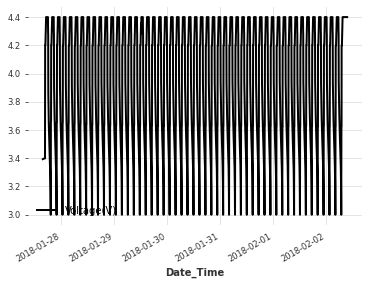

In [11]:
scaler_en = Scaler()
series_en_transformed = scaler_en.fit_transform(ser['Voltage(V)'])
train, val = series_en_transformed.split_after(pd.Timestamp('1/30/2018  10:26:10 AM'))
#series_en_transformed.plot()
scaler_en.inverse_transform(series_en_transformed).plot()

#### Creating the model

In [12]:
model_nbeats = NBEATSModel(
    input_chunk_length=300,
    output_chunk_length=28,
    generic_architecture=True,
    num_stacks=10,
    num_blocks=1,
    num_layers=4,
    layer_widths=512,
    n_epochs=100,
    nr_epochs_val_period=1,
    batch_size=16,
    model_name='nbeats_run',
    force_reset=True
)

In [13]:
model_nbeats.fit(train, val_series=val, verbose=True)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/trainer.py:1767: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  category=PossibleUserWarning,
INFO:pytorch_lightning.callbacks.model_summary:
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 9.5 M 
---------------------------------------------------
9.5 M     Trainable params
4.4 K     Non-trainable 

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=100` reached.


In [14]:
from darts.metrics import mae

Predicting: 105it [00:00, ?it/s]

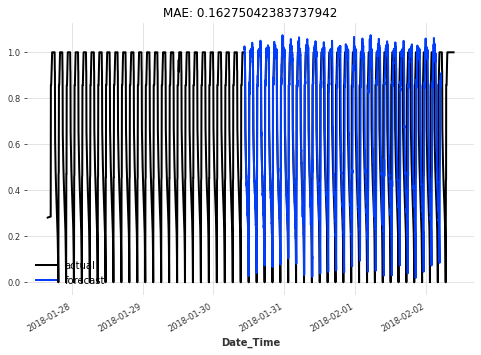

In [16]:
def eval_model(model):
    pred_series = model.predict(n=2000)
    plt.figure(figsize=(8,5))
    series_en_transformed.plot(label='actual')
    pred_series.plot(label='forecast')
    plt.title('MAE: {}'.format(mae(pred_series, val)))
    plt.legend()
    
    
    
    
eval_model(model_nbeats)

#### Backtesting

In [17]:
pred_series = model_nbeats.historical_forecasts(
    train,
    start=pd.Timestamp('1/29/2018  1:04:10 AM'), 
    forecast_horizon=850,
    stride=5,
    retrain=False,
    verbose=True
)

  0%|          | 0/31 [00:00<?, ?it/s]

Predicting: 105it [00:00, ?it/s]

  3%|▎         | 1/31 [00:00<00:11,  2.59it/s]

Predicting: 105it [00:00, ?it/s]

  6%|▋         | 2/31 [00:00<00:10,  2.68it/s]

Predicting: 105it [00:00, ?it/s]

 10%|▉         | 3/31 [00:01<00:10,  2.67it/s]

Predicting: 105it [00:00, ?it/s]

 13%|█▎        | 4/31 [00:01<00:10,  2.66it/s]

Predicting: 105it [00:00, ?it/s]

 16%|█▌        | 5/31 [00:01<00:09,  2.70it/s]

Predicting: 105it [00:00, ?it/s]

 19%|█▉        | 6/31 [00:02<00:09,  2.72it/s]

Predicting: 105it [00:00, ?it/s]

 23%|██▎       | 7/31 [00:02<00:08,  2.67it/s]

Predicting: 105it [00:00, ?it/s]

 26%|██▌       | 8/31 [00:03<00:08,  2.63it/s]

Predicting: 105it [00:00, ?it/s]

 29%|██▉       | 9/31 [00:03<00:08,  2.60it/s]

Predicting: 105it [00:00, ?it/s]

 32%|███▏      | 10/31 [00:03<00:08,  2.60it/s]

Predicting: 105it [00:00, ?it/s]

 35%|███▌      | 11/31 [00:04<00:07,  2.60it/s]

Predicting: 105it [00:00, ?it/s]

 39%|███▊      | 12/31 [00:04<00:07,  2.58it/s]

Predicting: 105it [00:00, ?it/s]

 42%|████▏     | 13/31 [00:04<00:06,  2.62it/s]

Predicting: 105it [00:00, ?it/s]

 45%|████▌     | 14/31 [00:05<00:06,  2.60it/s]

Predicting: 105it [00:00, ?it/s]

 48%|████▊     | 15/31 [00:05<00:06,  2.66it/s]

Predicting: 105it [00:00, ?it/s]

 52%|█████▏    | 16/31 [00:06<00:05,  2.67it/s]

Predicting: 105it [00:00, ?it/s]

 55%|█████▍    | 17/31 [00:06<00:05,  2.64it/s]

Predicting: 105it [00:00, ?it/s]

 58%|█████▊    | 18/31 [00:06<00:04,  2.64it/s]

Predicting: 105it [00:00, ?it/s]

 61%|██████▏   | 19/31 [00:07<00:04,  2.65it/s]

Predicting: 105it [00:00, ?it/s]

 65%|██████▍   | 20/31 [00:07<00:04,  2.63it/s]

Predicting: 105it [00:00, ?it/s]

 68%|██████▊   | 21/31 [00:07<00:03,  2.64it/s]

Predicting: 105it [00:00, ?it/s]

 71%|███████   | 22/31 [00:08<00:03,  2.65it/s]

Predicting: 105it [00:00, ?it/s]

 74%|███████▍  | 23/31 [00:08<00:03,  2.64it/s]

Predicting: 105it [00:00, ?it/s]

 77%|███████▋  | 24/31 [00:09<00:02,  2.65it/s]

Predicting: 105it [00:00, ?it/s]

 81%|████████  | 25/31 [00:09<00:02,  2.65it/s]

Predicting: 105it [00:00, ?it/s]

 84%|████████▍ | 26/31 [00:09<00:01,  2.63it/s]

Predicting: 105it [00:00, ?it/s]

 87%|████████▋ | 27/31 [00:10<00:01,  2.63it/s]

Predicting: 105it [00:00, ?it/s]

 90%|█████████ | 28/31 [00:10<00:01,  2.63it/s]

Predicting: 105it [00:00, ?it/s]

 94%|█████████▎| 29/31 [00:10<00:00,  2.63it/s]

Predicting: 105it [00:00, ?it/s]

 97%|█████████▋| 30/31 [00:11<00:00,  2.66it/s]

Predicting: 105it [00:00, ?it/s]

100%|██████████| 31/31 [00:11<00:00,  2.64it/s]


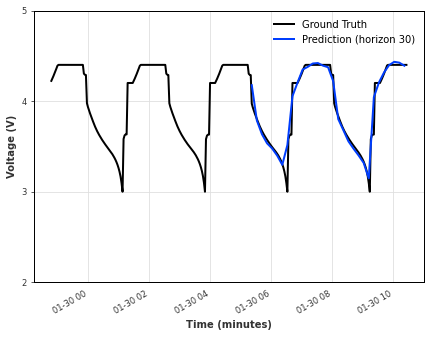

In [34]:
plt.figure(figsize=(7,5),edgecolor="black")
ax = plt.axes()
ser['Voltage(V)'][1650:2000].plot(label='Ground Truth')
scaler_en.inverse_transform(pred_series)[0:1000].plot(label=('Prediction (horizon 30)'))
plt.xlabel('Time (minutes)')
plt.ylabel('Voltage (V)')
plt.yticks(np.arange(2,6))
ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
plt.savefig("/content/drive/MyDrive/ChargeCapacity_dataset4_horizon30_nbeats.pdf",bbox_inches="tight")
#ser[750:1250].plot(label='Ground Truth')
#scaler_en.inverse_transform(pred_series)[0:50].plot(label=('Prediction (horizon 5)'))